In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("export_n_20.csv")

In [3]:
df.head()

,customer_id,Unnamed: 1,num_journeys,max_journey,discover,number_accounts,one_more_journey,most_repeated_event,average_length_seq,approved_credit,...,downpayment_cleared,order_ships,max_milestone,has_prospecting,has_pre_application,initial_device,time_in_discover,time_in_apply,first_20_events,time_since_last_event
0,708,0,2,91,False,2,True,4,60.5,True,...,True,True,6.0,True,False,2.0,0.0,2045.0,[12 4 4 4 4 24 29 4 4 4 4 4 4 4 4 ...,[0.000000e+00 1.100000e+03 2.851830e+05 4.5900...
1,3591,0,1,63,False,1,False,4,58.0,True,...,False,False,1.0,True,False,2.0,0.0,218.0,[12 4 11 5 5 4 4 4 4 4 4 4 11 4 4 ...,[ 0. 218. 89. 20. 28. 24. 95. 75. 87. ...
2,5414,0,1,27,True,1,False,4,24.0,True,...,False,False,1.0,True,False,2.0,4544216.0,549.0,[21 12 4 2 4 11 4 11 5 4 11 4 11 5 4 ...,[0.000000e+00 1.783191e+06 5.490000e+02 2.1051...
3,6072,0,1,8,True,1,False,4,6.0,True,...,False,False,1.0,True,False,2.0,1089605.0,260.0,[12 4 2 4 24 21 0 0 0 0 0 0 0 0 0 ...,[0.000000e+00 2.600000e+02 6.630000e+03 1.0896...
4,8039,0,1,11,True,1,False,19,11.0,True,...,False,False,1.0,False,False,2.0,30400833.0,21684.0,[19 19 19 19 19 3 19 19 12 2 4 0 0 0 0 ...,[0.0000000e+00 5.8000000e+01 2.0000000e+00 3.0...


In [4]:
df.columns

Index(['customer_id', 'Unnamed: 1', 'num_journeys', 'max_journey', 'discover',
       'number_accounts', 'one_more_journey', 'most_repeated_event',
       'average_length_seq', 'approved_credit', 'first_purchase',
       'account_activitation', 'downpayment_received', 'downpayment_cleared',
       'order_ships', 'max_milestone', 'has_prospecting',
       'has_pre_application', 'initial_device', 'time_in_discover',
       'time_in_apply', 'first_20_events', 'time_since_last_event'],
      dtype='object')

In [5]:
defs = pd.read_csv("Event_Definitions.csv")
defs.head()

,event_name,journey_id,event_definition_id,milestone_number,stage
0,application_phone_approved,1,15,1.0,Apply for Credit
1,application_phone_declined,1,16,NaN,Apply for Credit
2,application_phone_pending,1,17,NaN,Apply for Credit
3,application_web_approved,1,12,1.0,Apply for Credit
4,application_web_declined,1,13,NaN,Apply for Credit


# Order-Shipped Pie Chart

/var/folders/hv/y5s5rkv130v_g87x7dg3dg3m0000gn/T/ipykernel_36061/1312763481.py:9: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches, labels=proportions.index, loc="best", fontsize = 14)


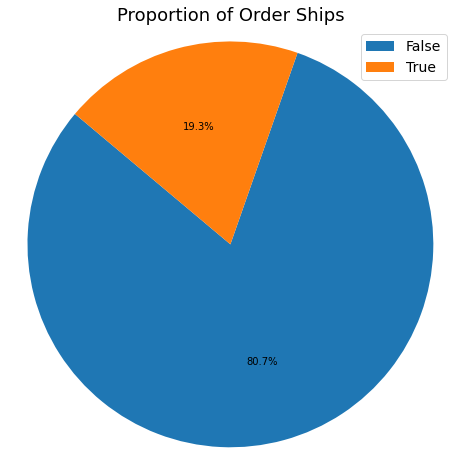

In [6]:
# Calculate proportions
proportions = df['order_ships'].value_counts(normalize=True) * 100

# Plotting using a pie chart
plt.figure(figsize=(8, 8))  
patches, _, _ = plt.pie(proportions, labels=None, autopct='%1.1f%%', startangle=140)

# Adding a legend
plt.legend(patches, labels=proportions.index, loc="best", fontsize = 14)

# Adding a title
plt.title('Proportion of Order Ships', fontsize = 18)

# Save the plot as an image file
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('order_ships_pie_chart.png')  # Save as PNG file
plt.show()

# Max Journey Boxplot

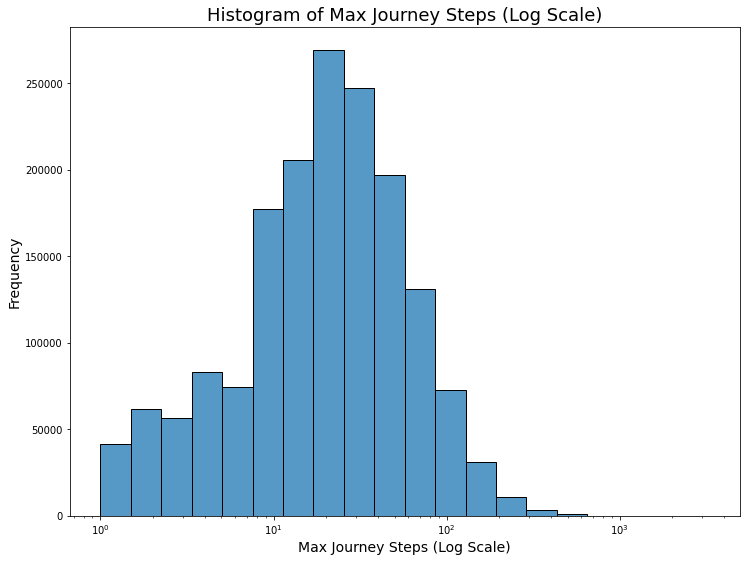

In [15]:
# Plotting using Seaborn with log scale
plt.figure(figsize=(12, 9))  # Adjust the width and height as needed
sns.histplot(df['max_journey'], bins=20, log_scale=True)  # Adjust bins as needed

# Adding labels and title
plt.xlabel('Max Journey Steps (Log Scale)', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title('Histogram of Max Journey Steps (Log Scale)', fontsize = 18)

# Show the plot
plt.savefig('max_journey_histogram.png')
plt.show()

# Discover vs Order_Ships

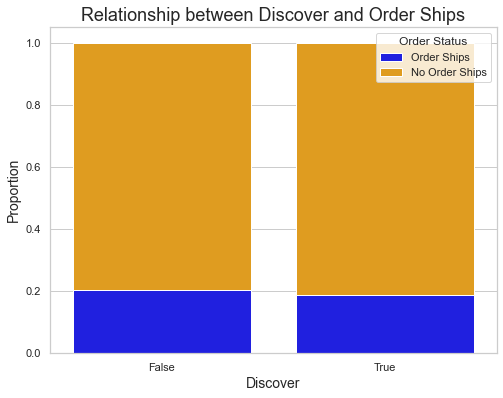

In [31]:
plot_df = df.copy()
plot_df['discover'] = plot_df['discover'].astype(int)
plot_df['order_ships'] = plot_df['order_ships'].astype(int)

# Calculate proportions manually
proportions = plot_df.groupby('discover')['order_ships'].value_counts(normalize=True).unstack().fillna(0)

# Plotting using Seaborn
plt.figure(figsize=(8, 6))  # Adjust the width and height as needed
bottom_bar = sns.barplot(data=proportions, x=proportions.index, y=proportions[1], color='blue', label='Order Ships')
sns.barplot(data=proportions, x=proportions.index, y=proportions[0], color='orange', bottom=proportions[1], label='No Order Ships')

# Adding labels and title
plt.xlabel('Discover', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)
plt.title('Relationship between Discover and Order Ships', fontsize = 18)

# Show the legend with custom labels
plt.legend(title='Order Status')

# Set y-axis tick labels
plt.xticks(ticks=[0, 1], labels=['False', 'True'])

# Show the plot

plt.savefig('relationship_discover_order_ships.png')
plt.show()